In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.special
import ghalton
import numpy as np
import numpy.fft as fft
import time
import os
import sys
sys.path.insert(1,'/Users/zyzdiana/GitHub/AC297r-Volume-Registration/code')
from utils import clean

In [3]:
from utils import clean,to_radian,hann
from rotation_2d import rot_cost_func
from visualize import plot_cost_func
from cost_functions import cf_ssd
from get_data import get_data_all,get_data

In [6]:
# load data
data_dict = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/data_dict.p','rb'))
dict_10mm, dict_8mm, dict_6_4mm = get_data_all()
list_6_4mm, list_8mm, list_10mm = get_data()

In [4]:
dict_10mm = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/dict_10mm.p','rb'))
dict_8mm = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/dict_8mm.p','rb'))
dict_6_4mm = pickle.load(open('/Users/zyzdiana/Dropbox/THESIS/Pickled_Results/dict_6_4mm.p','rb'))

In [5]:
def phase_translation_2d(im0, im1):
    '''
    detect integer translation from phase translation
    '''
    f0 = fft.fft2(im0)
    f1 = fft.fft2(im1)
    ir = abs(fft.ifft2((f0 * f1.conjugate()) / (abs(f0) * abs(f1))))
    t0, t1 = np.unravel_index(np.argmax(ir), im0.shape)
    return [t0, t1]

In [47]:
# testing the 2d translation with 8mm resolution
im0 = fft.fft2(fft.ifft2(list_8mm[0].max(axis=1)))
im1 = fft.fft2(fft.ifft2(list_8mm[4].max(axis=1)))
print 'integer translation:',phase_translation_2d(im0, im1)

integer translation: [1, 0]


In [50]:
def phase_translation_3d(vol0, vol1):
    f0 = fft.fftn(vol0)
    f1 = fft.fftn(vol1)
    ir = abs(fft.ifftn((f0 * f1.conjugate()) / (abs(f0) * abs(f1))))
    t0, t1, t2 = np.unravel_index(np.argmax(ir), vol0.shape)
    return [t0, t1, t2]

In [52]:
# test the 3d translation with 8mm resolution
vol0 = fft.fft2(fft.ifft2(list_8mm[0]))
vol1 = fft.fft2(fft.ifft2(list_8mm[4]))
print phase_translation_3d(vol0,vol1)

# test the 3d translation with 6_4mm resolution
vol0 = fft.fft2(fft.ifft2(list_6_4mm[0]))
vol1 = fft.fft2(fft.ifft2(list_6_4mm[4]))
print phase_translation_3d(vol0,vol1)

# test the 3d translation with 10mm resolution
vol0 = fft.fft2(fft.ifft2(list_10mm[0]))
vol1 = fft.fft2(fft.ifft2(list_10mm[4]))
print phase_translation_3d(vol0,vol1)

[1, 0, 0]
[2, 0, 0]
[1, 0, 0]


In [29]:
from rotation_2d import bilinear_interp

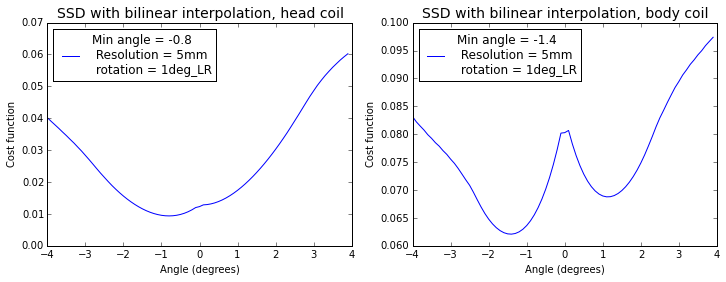

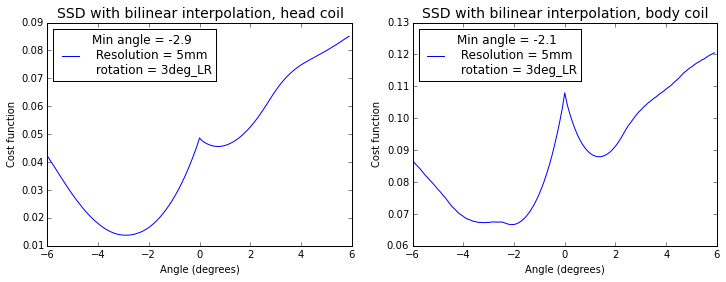

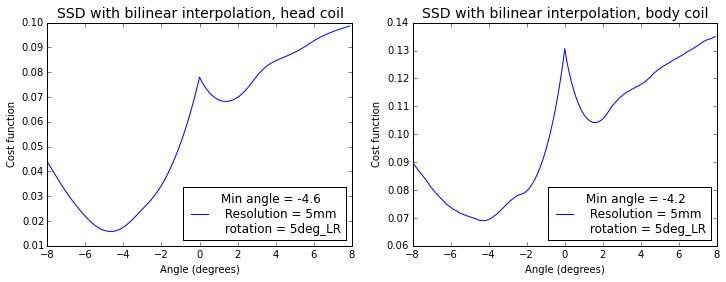

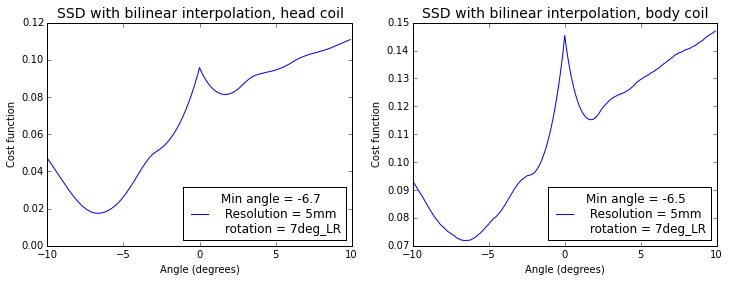

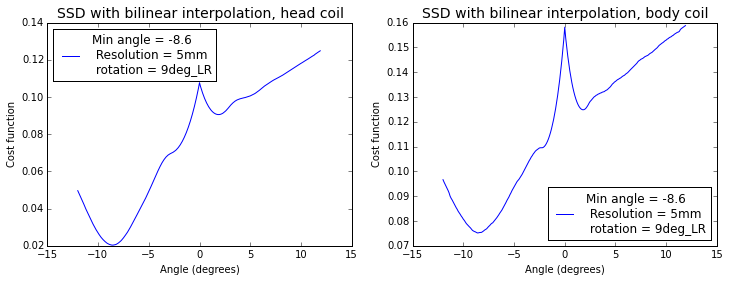

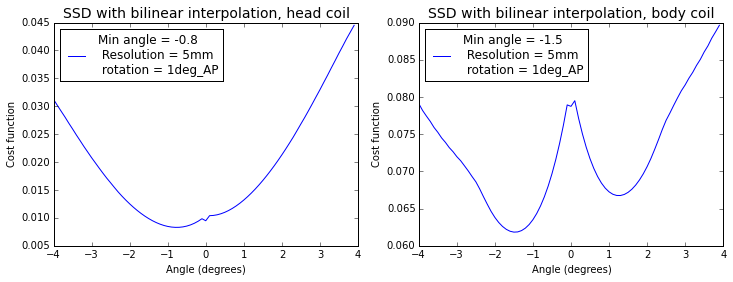

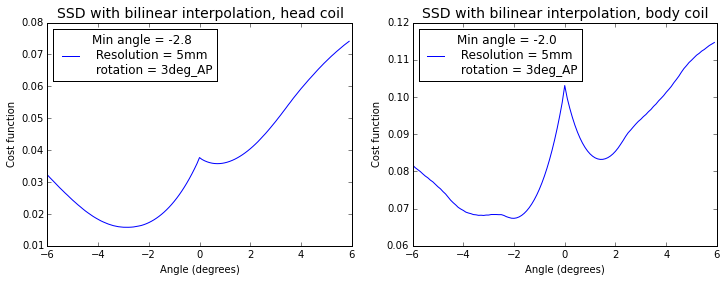

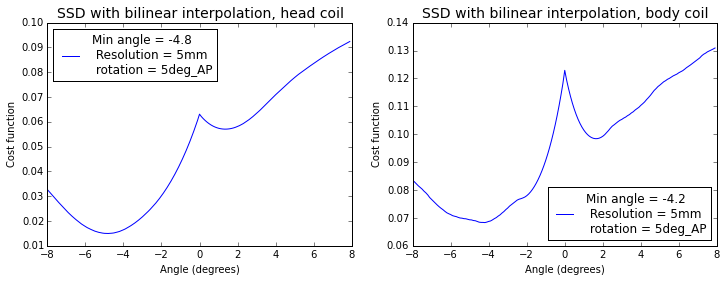

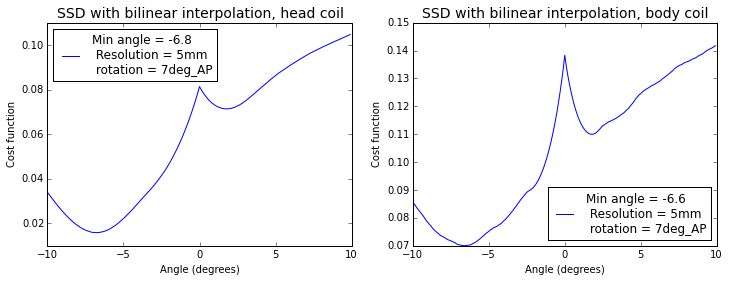

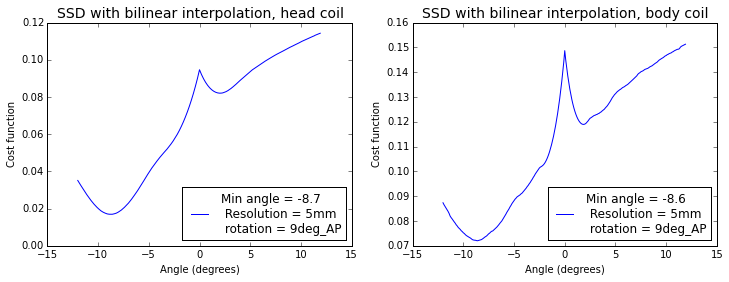

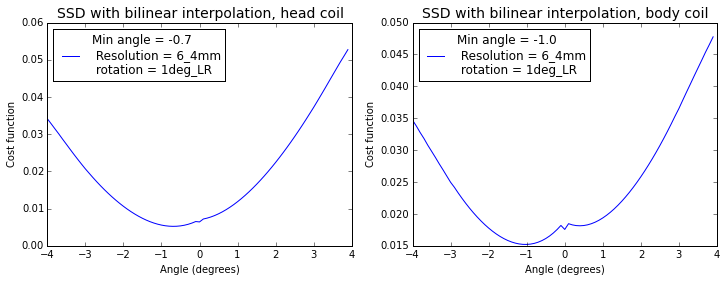

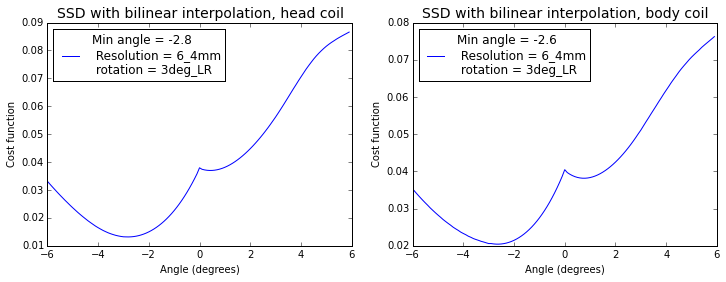

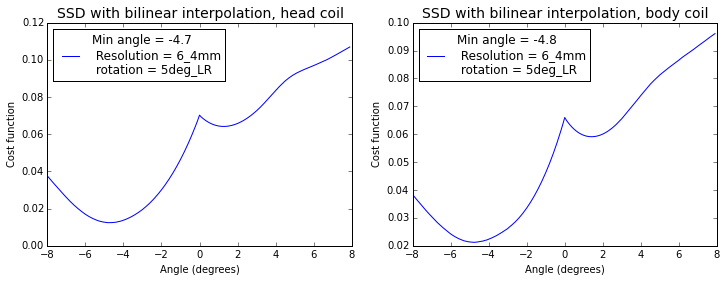

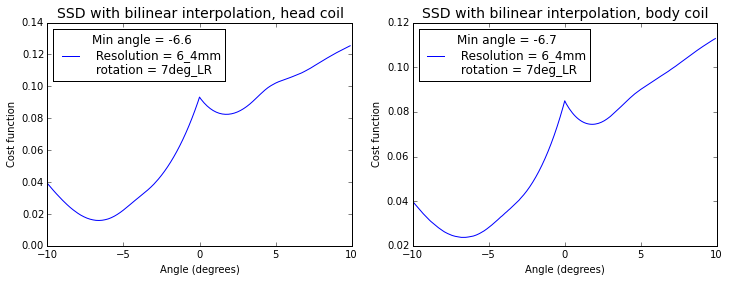

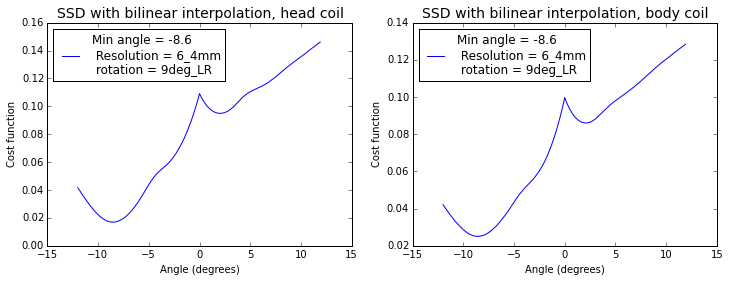

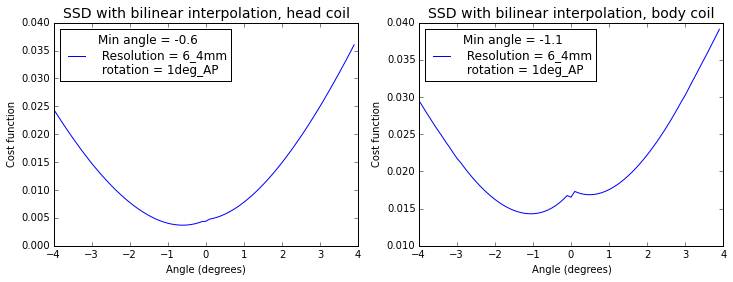

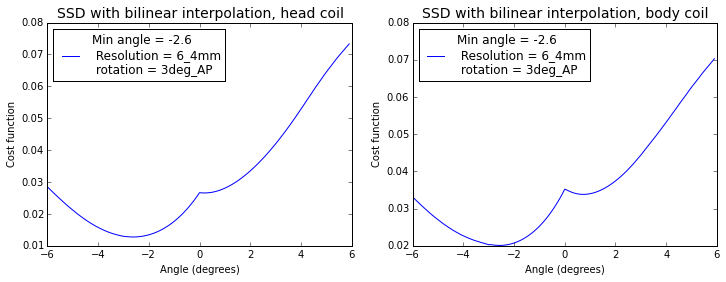

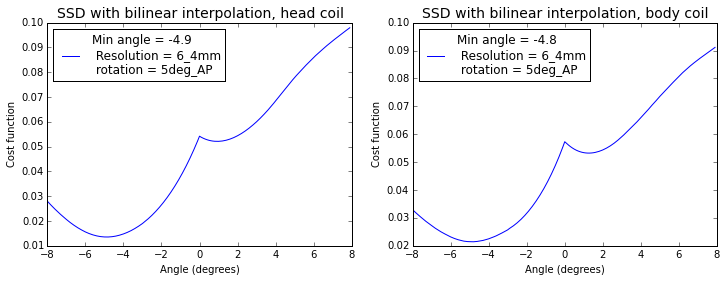

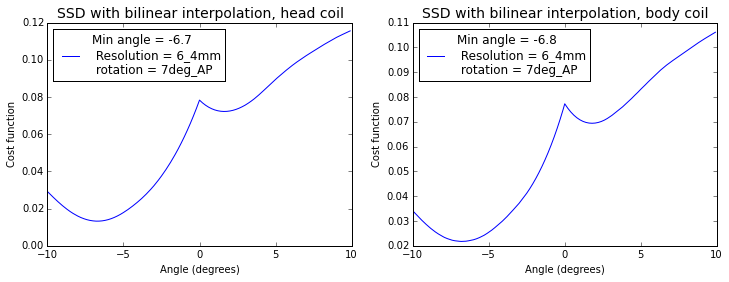

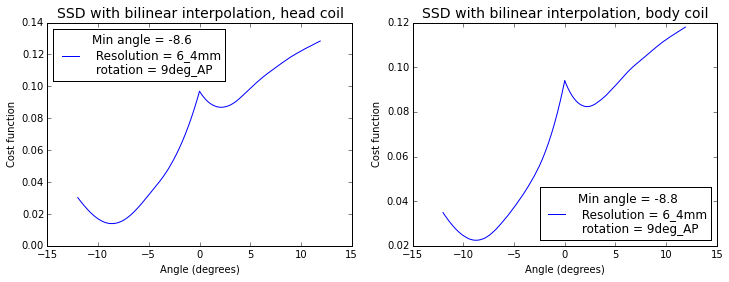

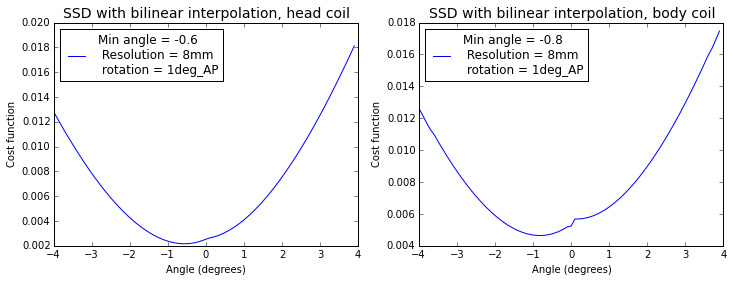

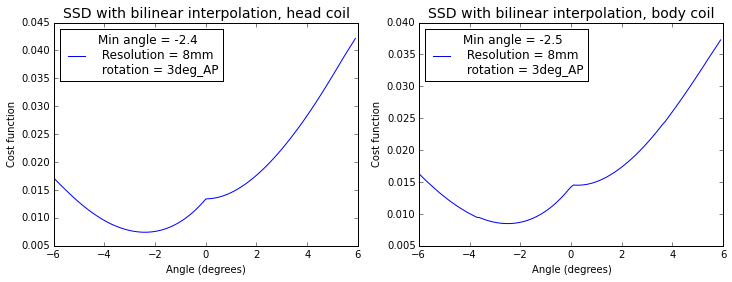

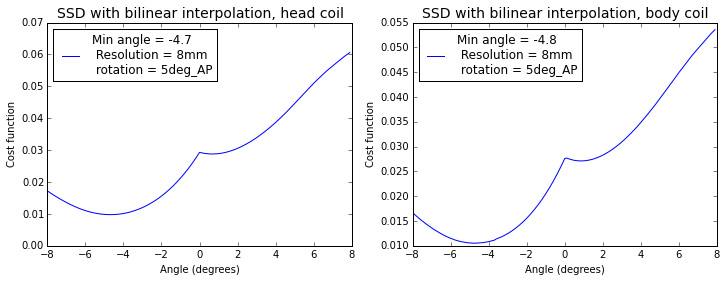

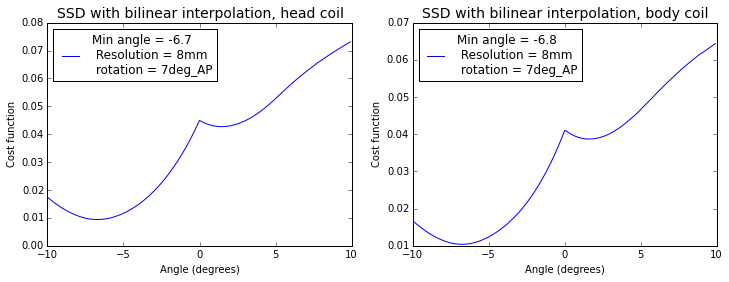

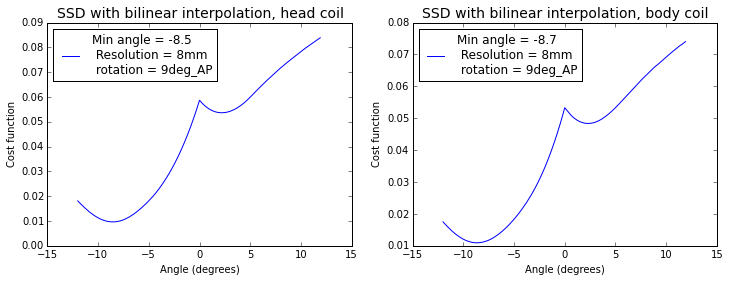

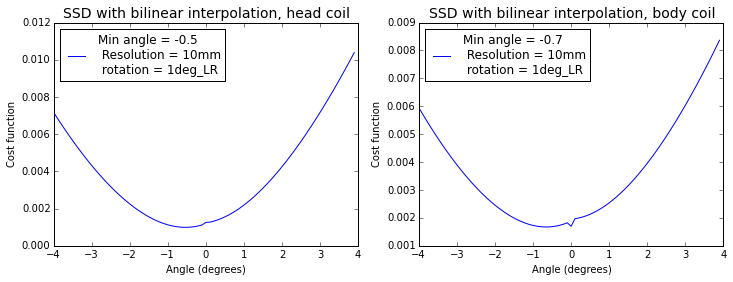

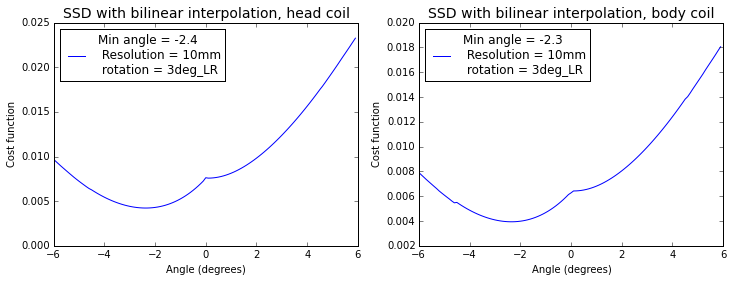

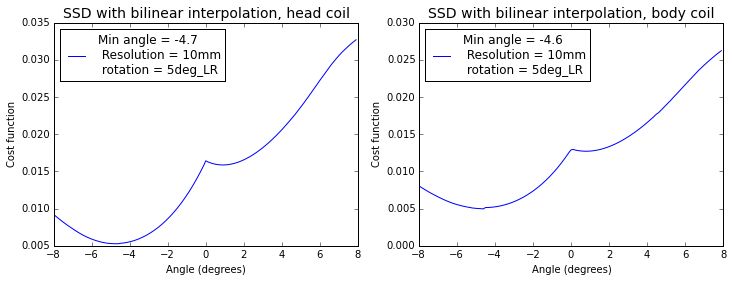

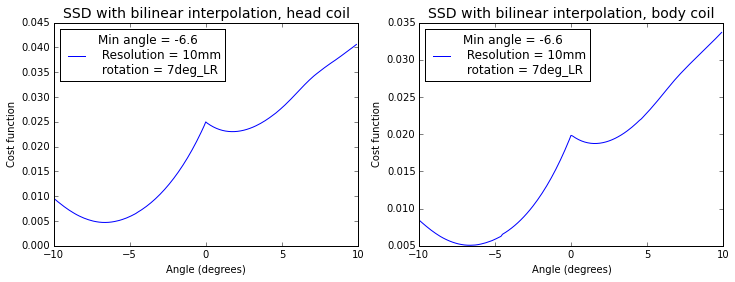

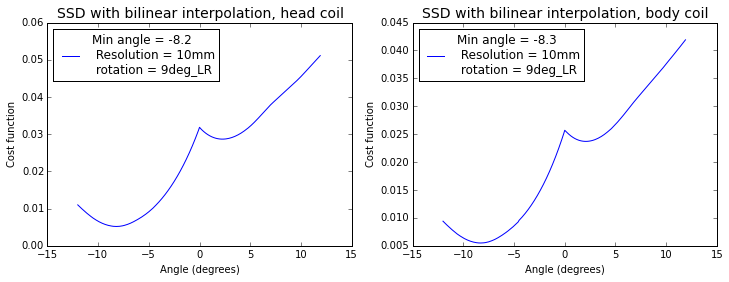

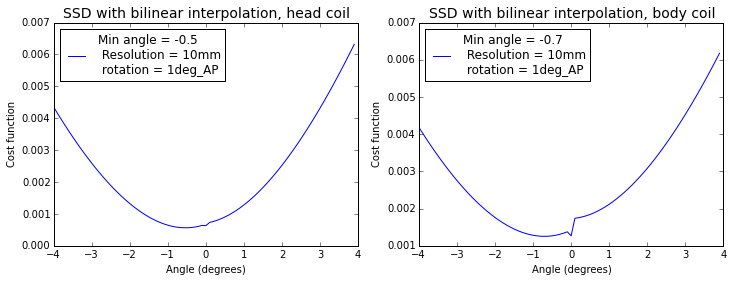

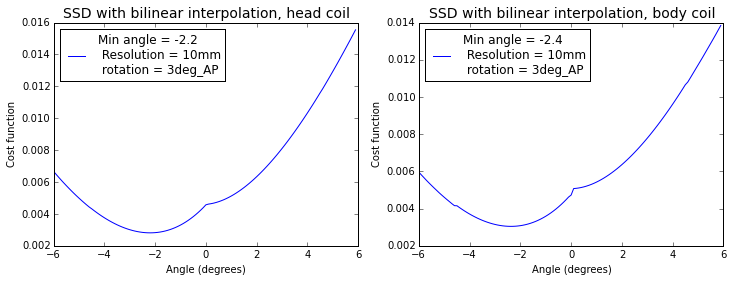

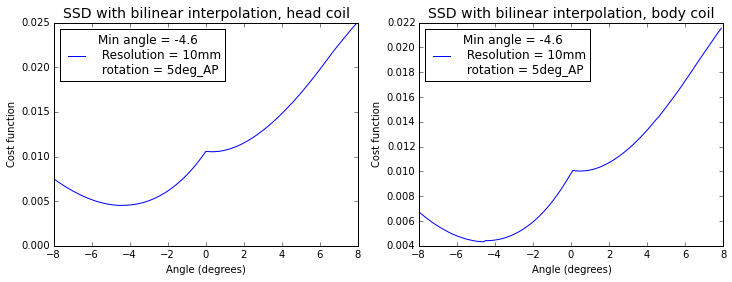

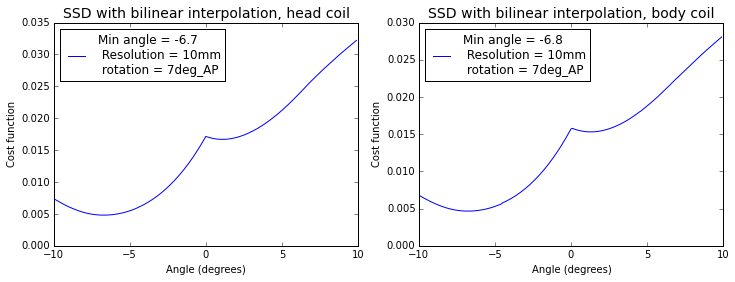

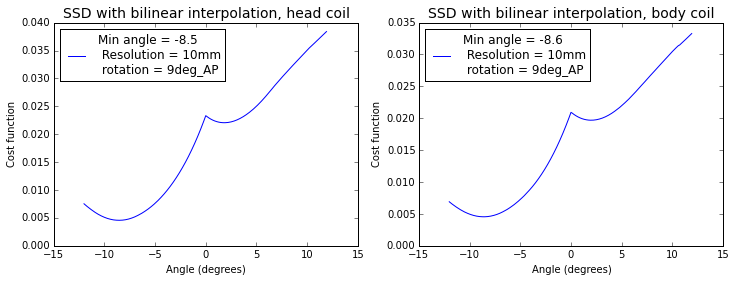

In [7]:
# repetition 0
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0],thetas,axis=ax)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'bilinear',deg+'_'+rot, coil)
            plt.show()

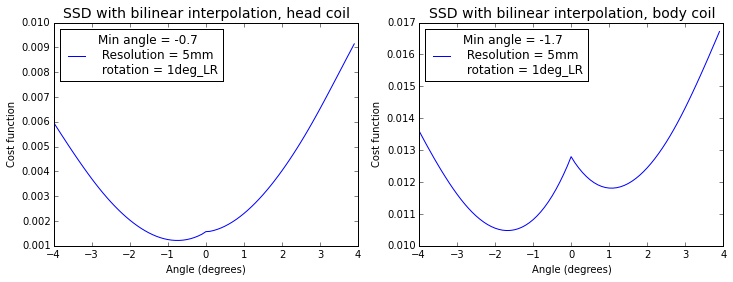

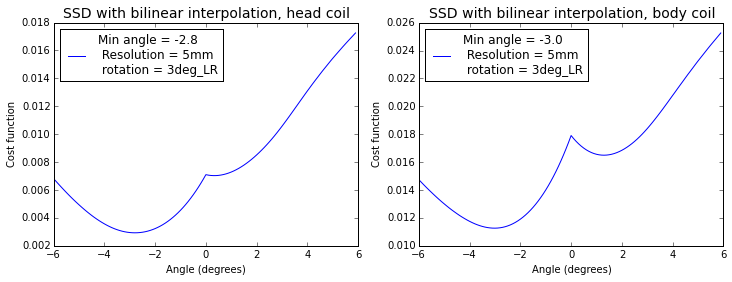

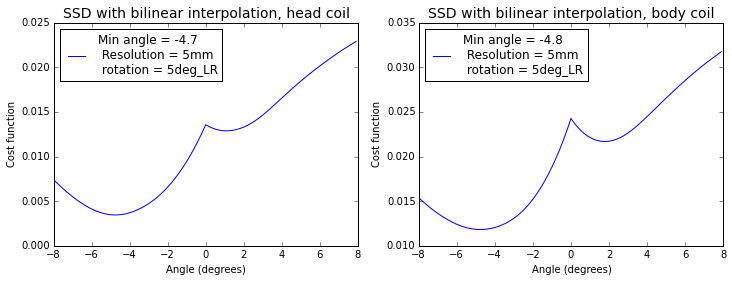

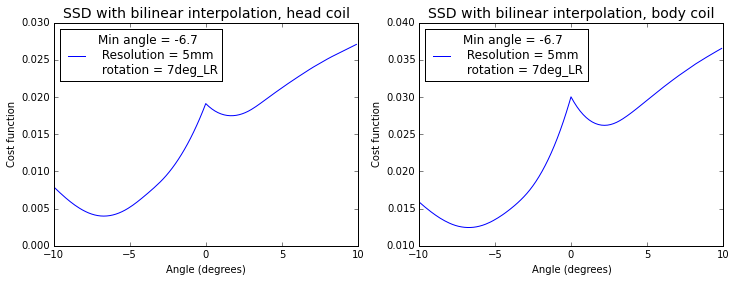

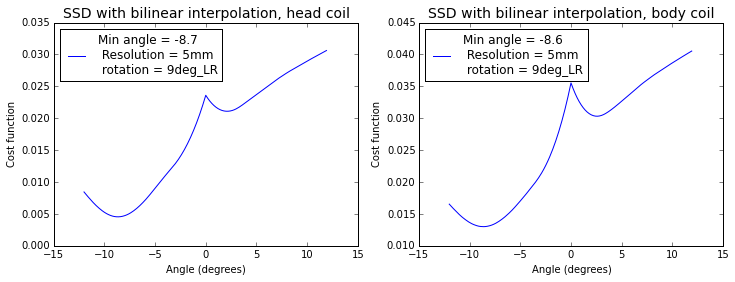

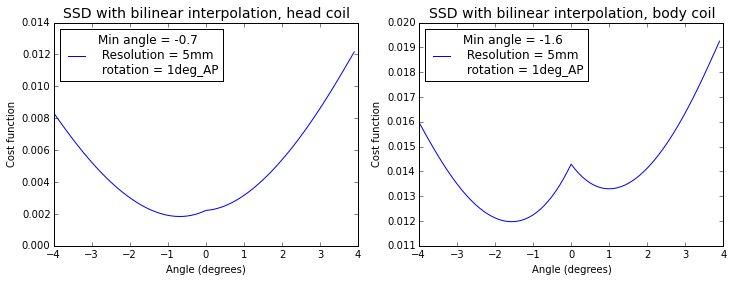

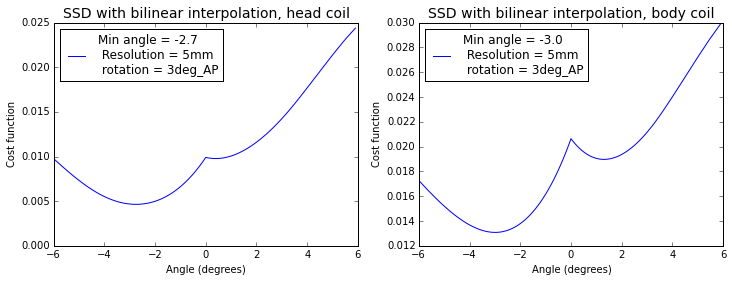

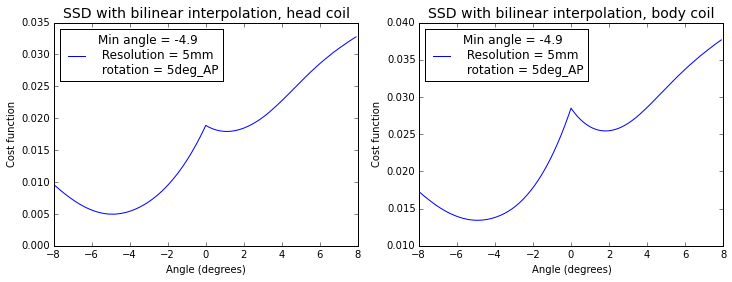

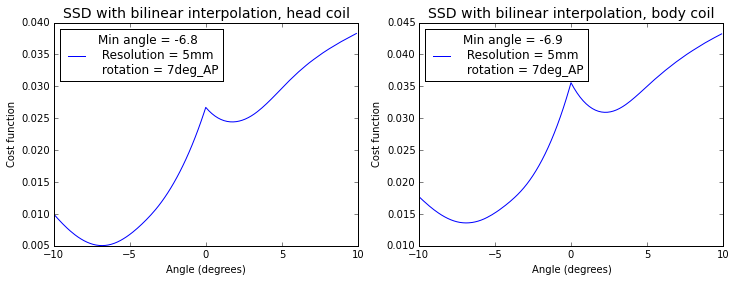

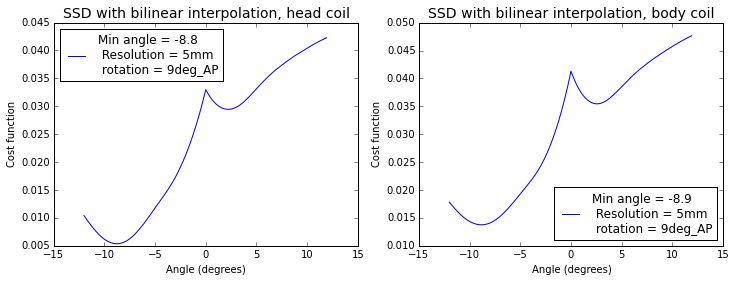

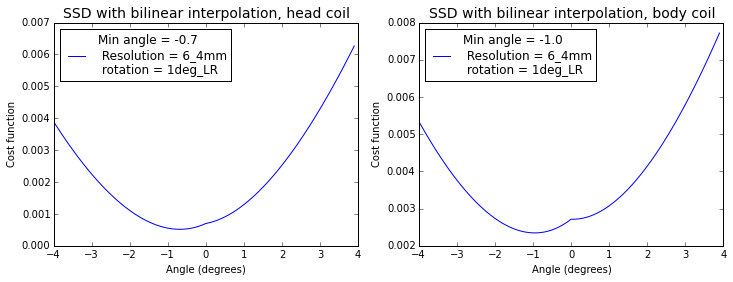

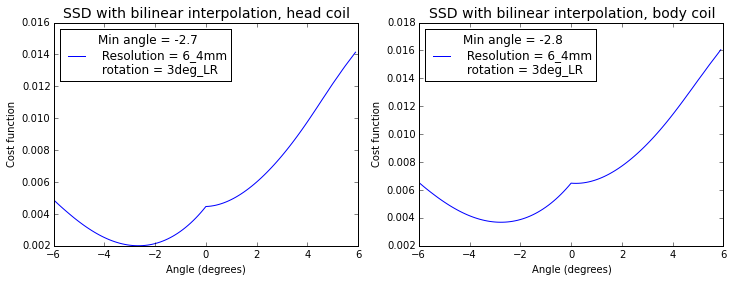

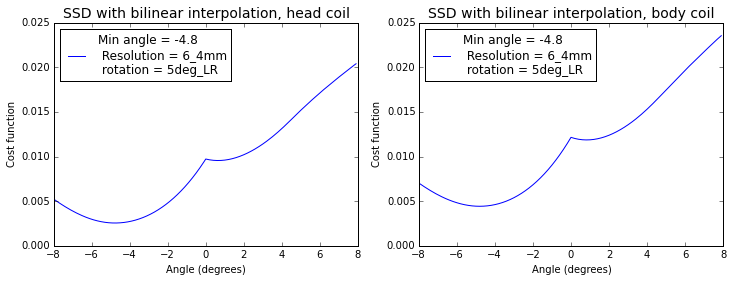

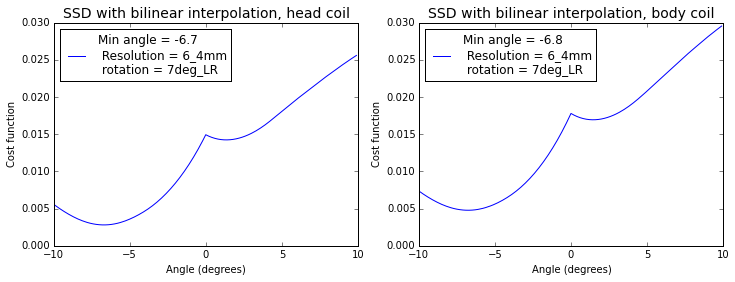

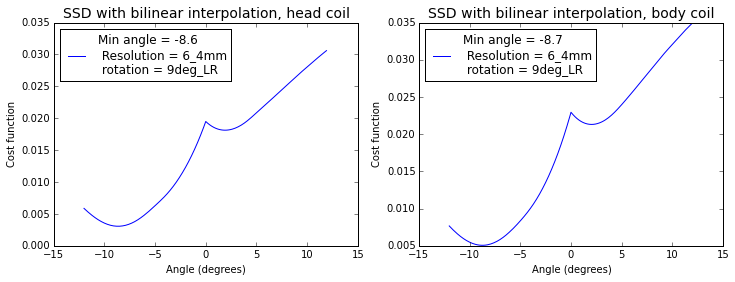

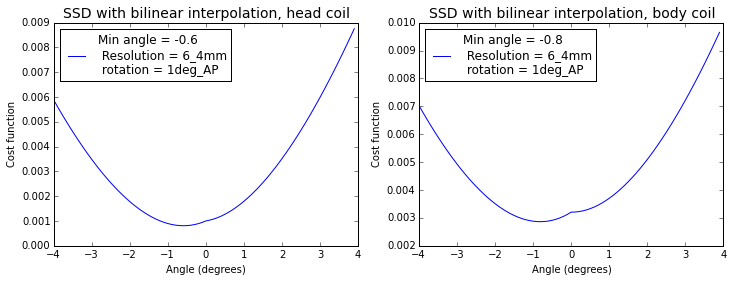

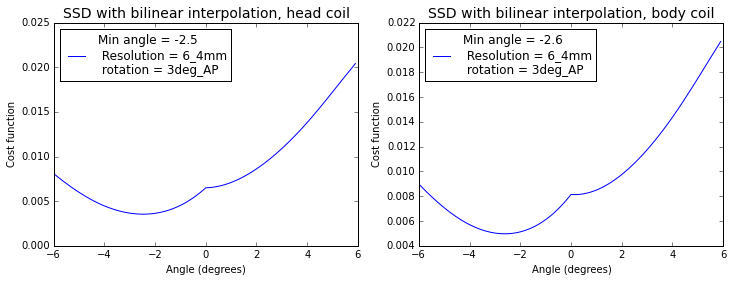

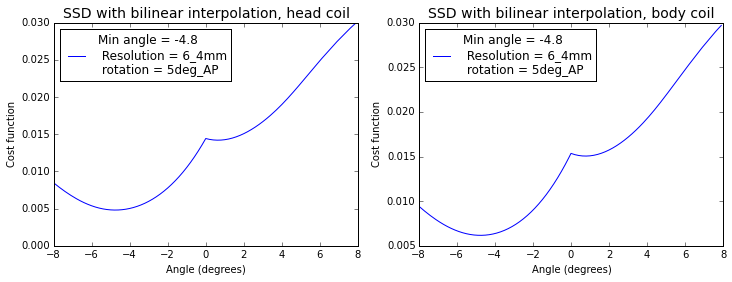

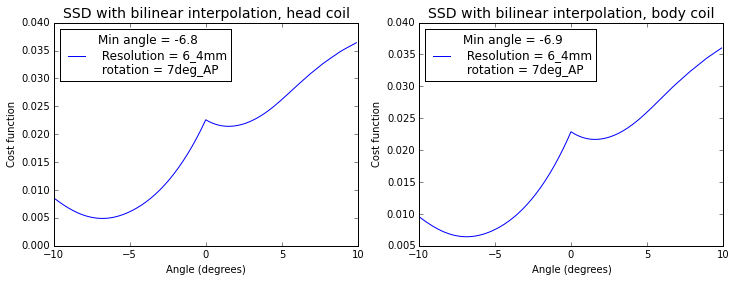

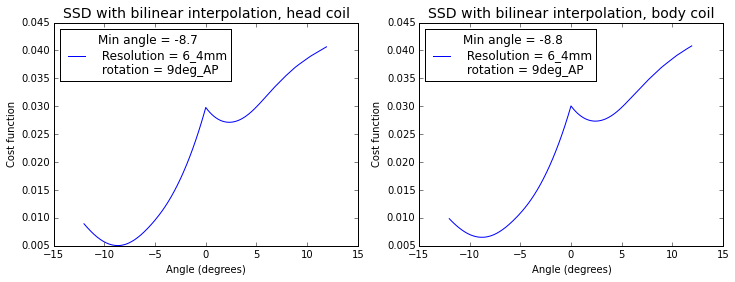

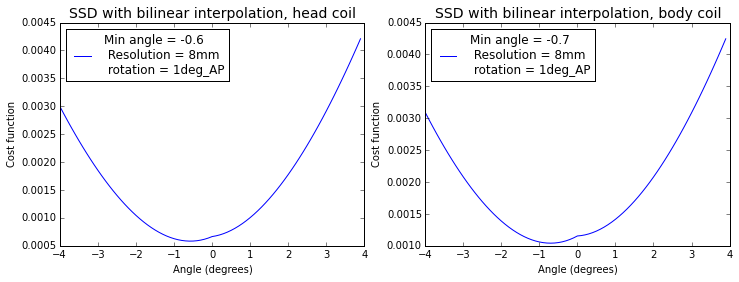

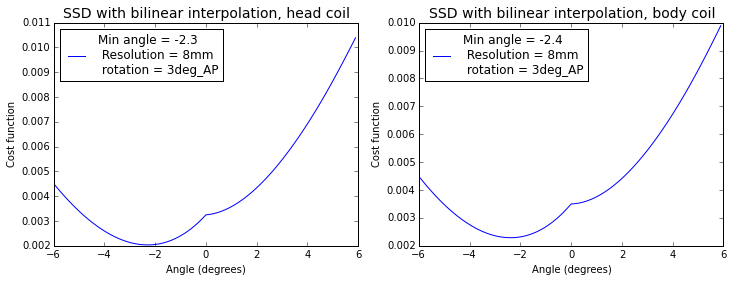

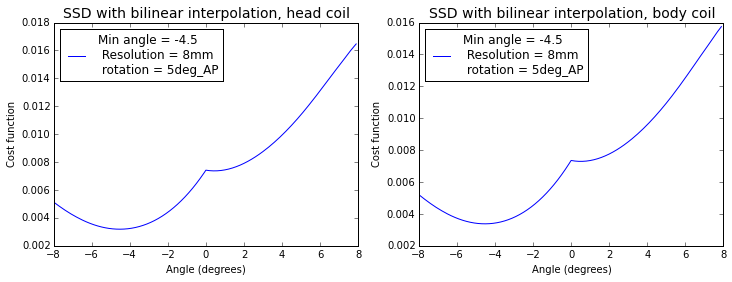

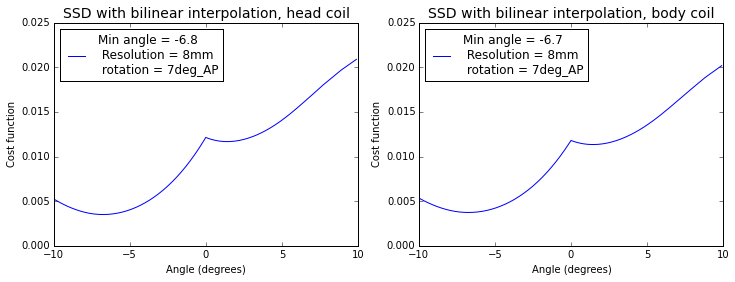

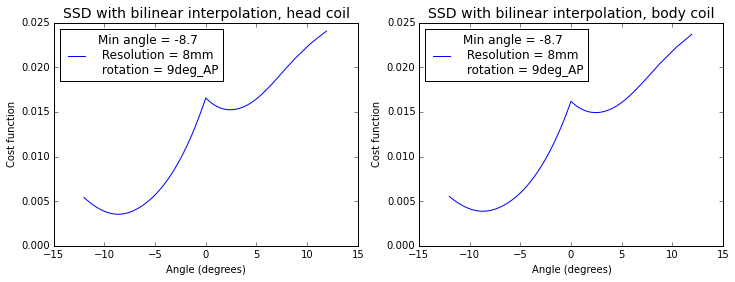

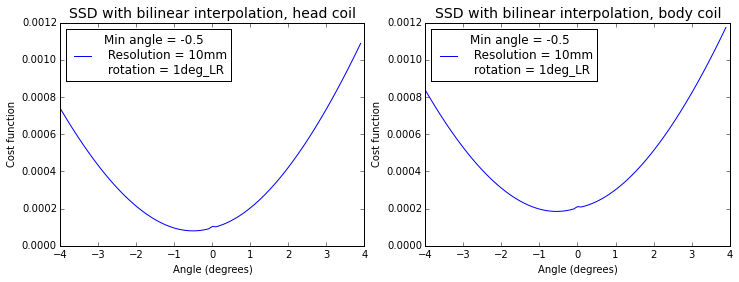

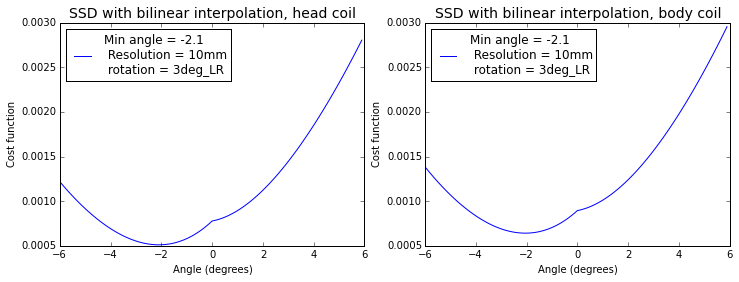

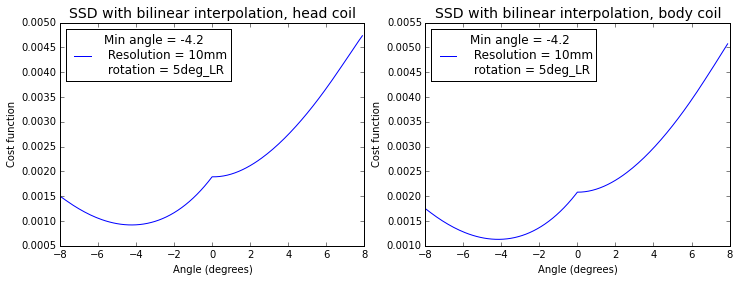

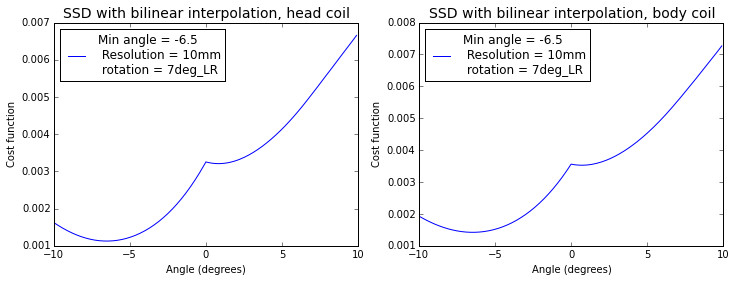

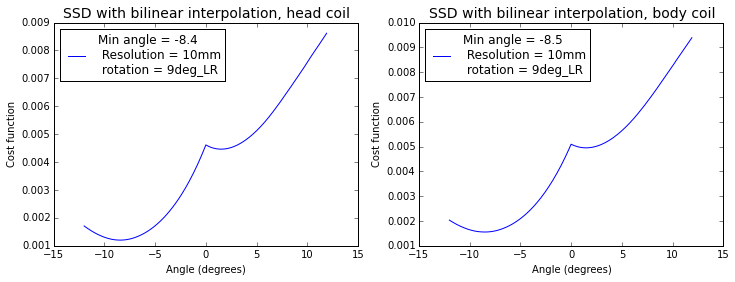

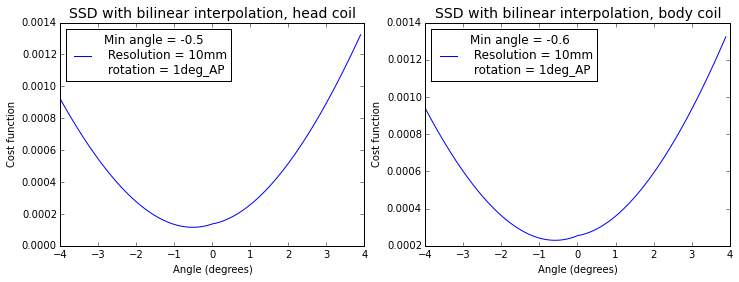

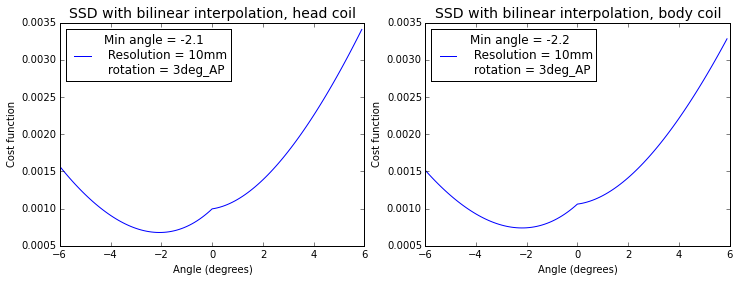

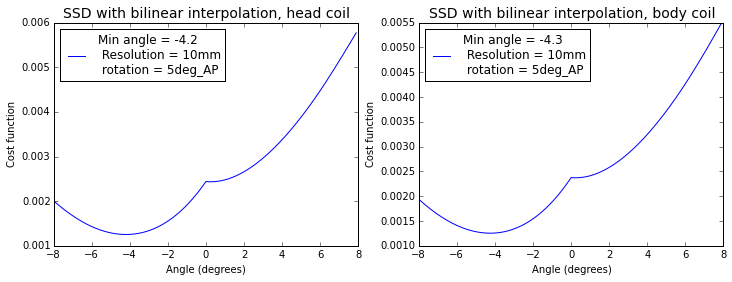

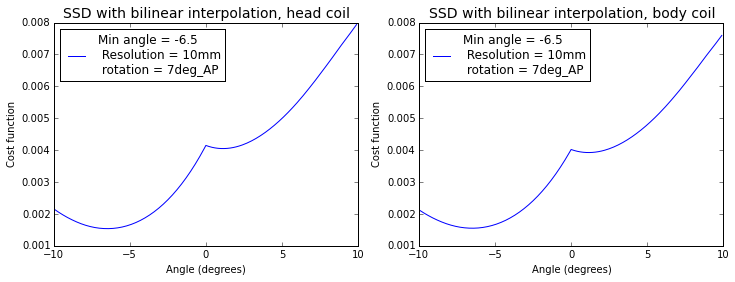

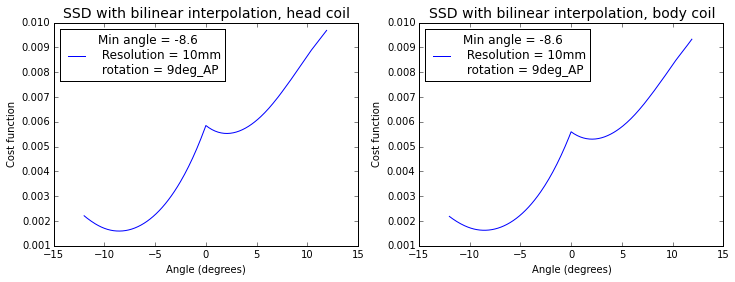

In [8]:
# repetition 0
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                cost = rot_cost_func(data_dict[res][coil]['iso'][0],data_dict[res][coil][rot][deg][0],thetas,axis=ax,mask=True,smooth=True)
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, cost, res, 'bilinear',deg+'_'+rot, coil)
            plt.show()

In [31]:
from rotation_2d import rot_halton_cost_func

 14 14

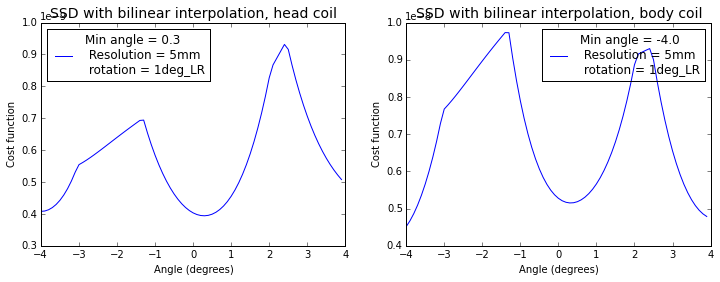

 14 14

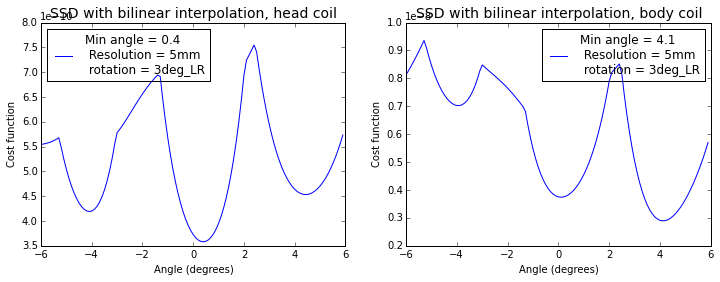

 14 14

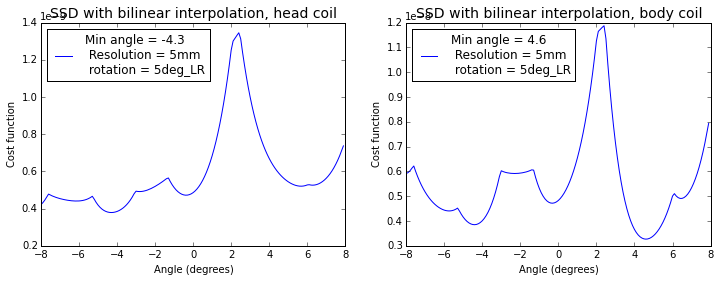

 14 14

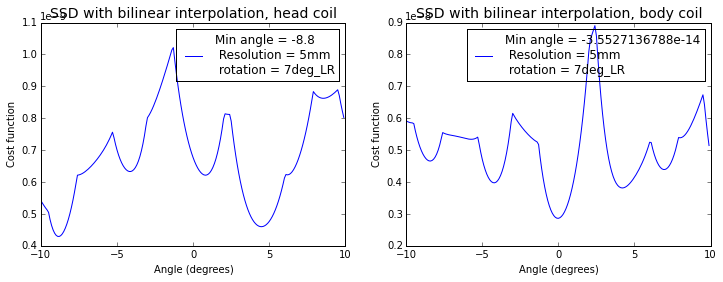

 14 14

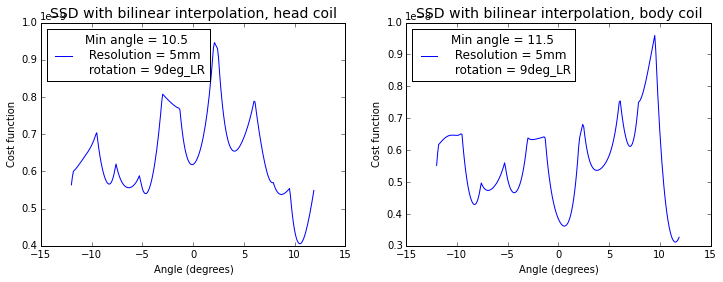

 14 14

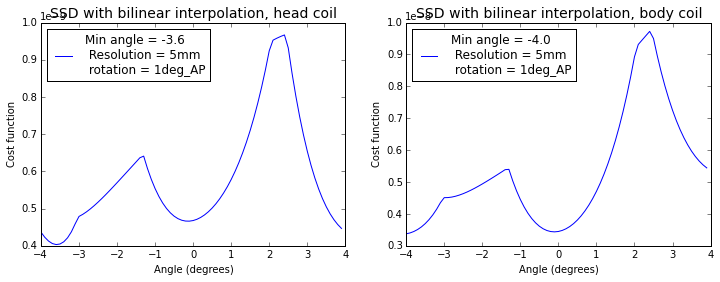

 14 14

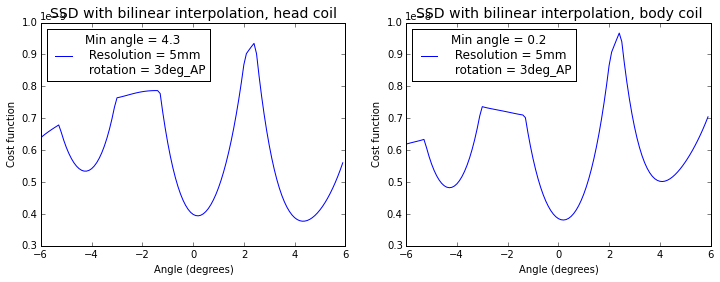

 14 14

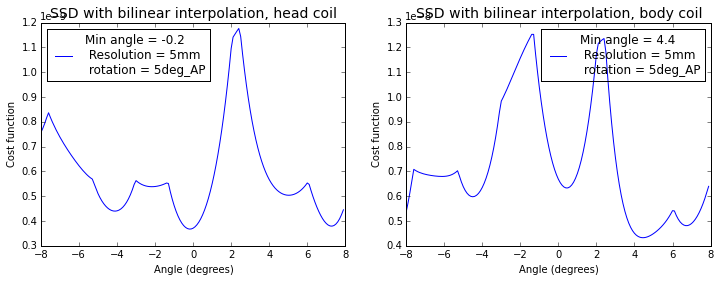

 14 14

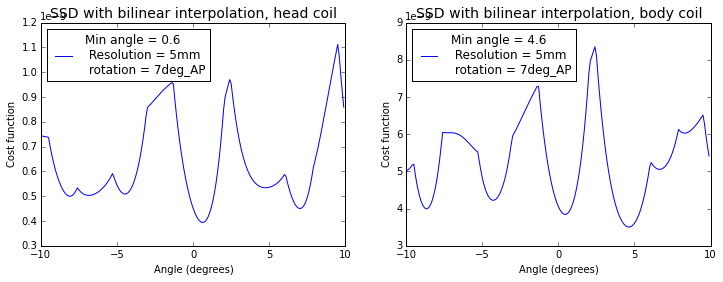

 14 14

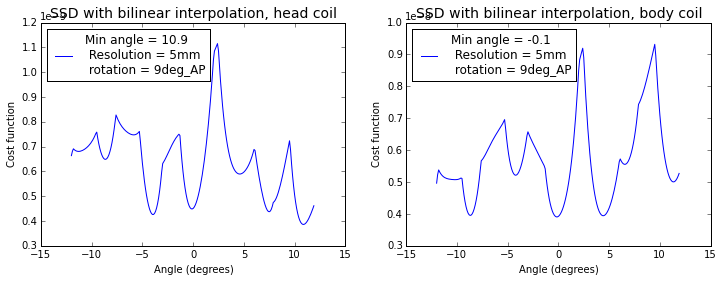

 14 14

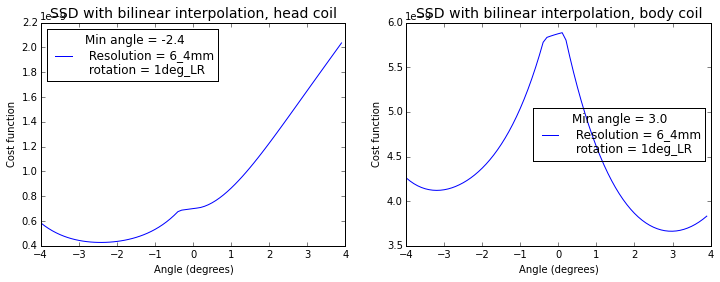

 14 14

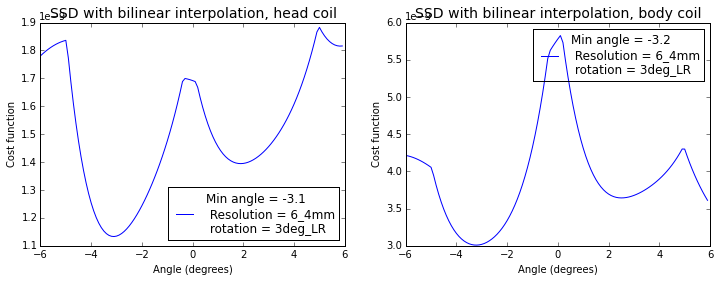

 14 14

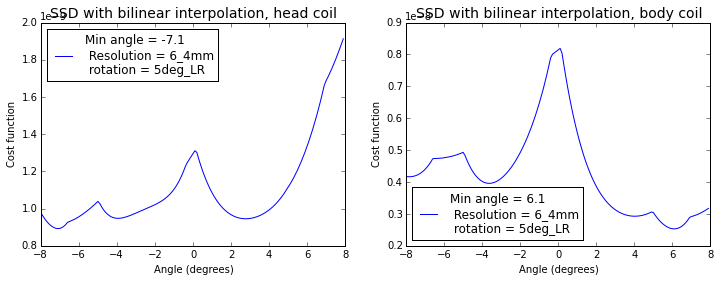

 14 14

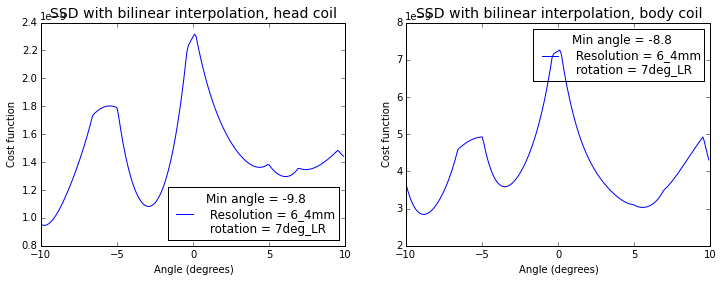

 14 14

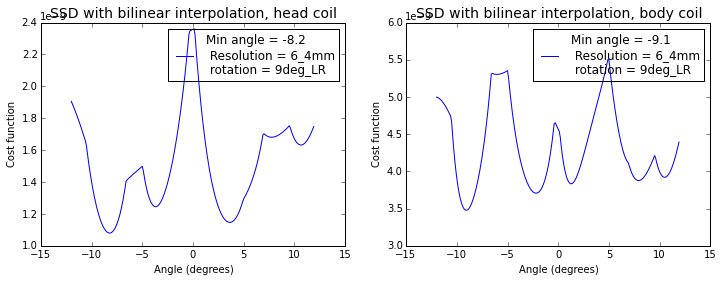

 14 14

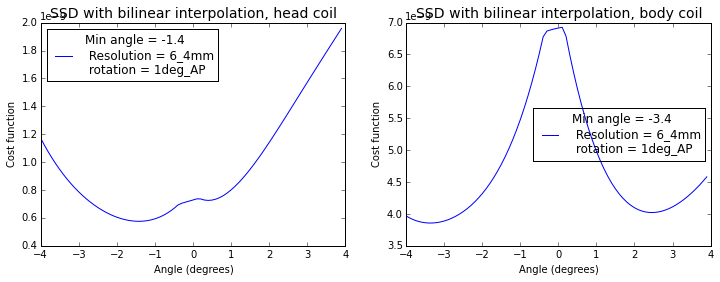

 14 14

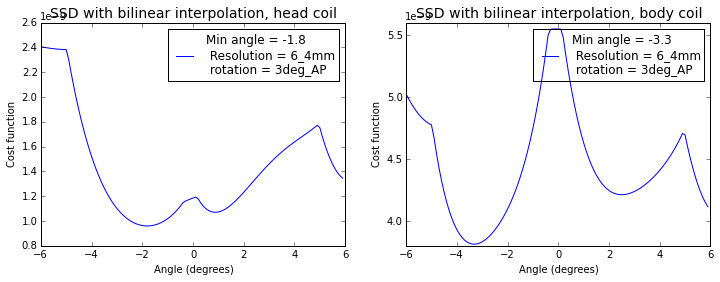

 14 14

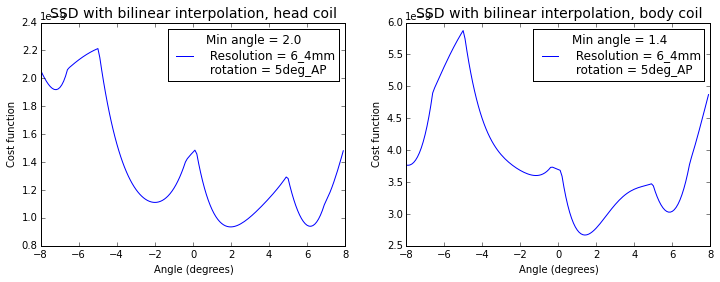

 14 14

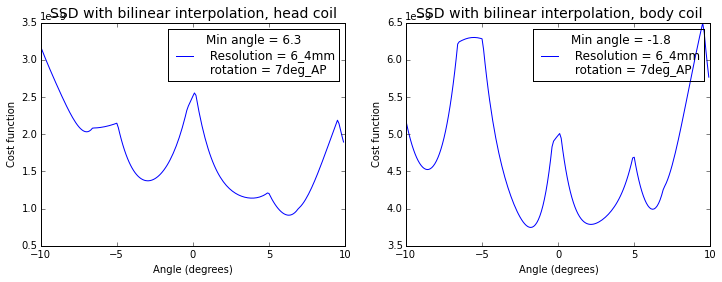

 14 14

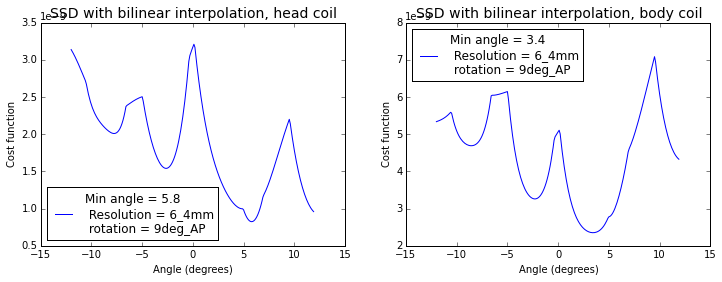

 14 14

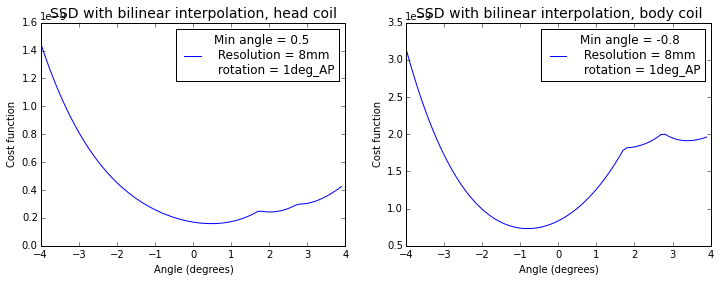

 14 14

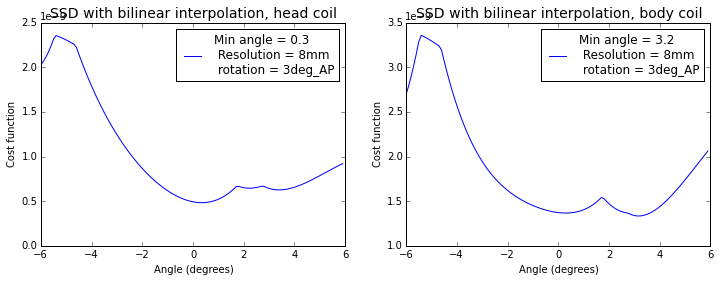

 14 14

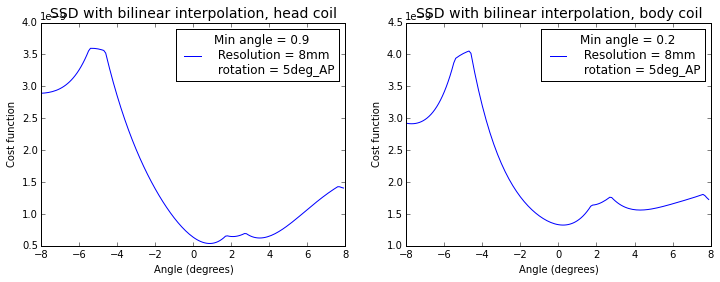

 14 14

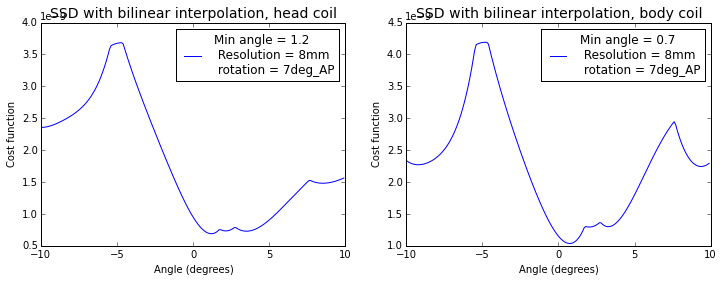

 14 14

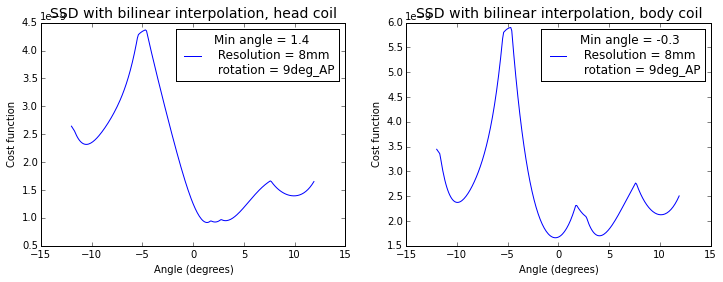

 14 14

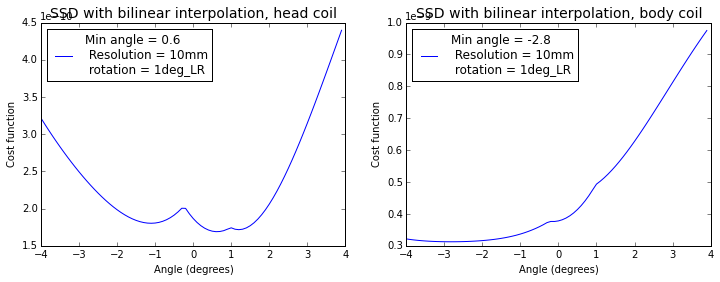

 14 14

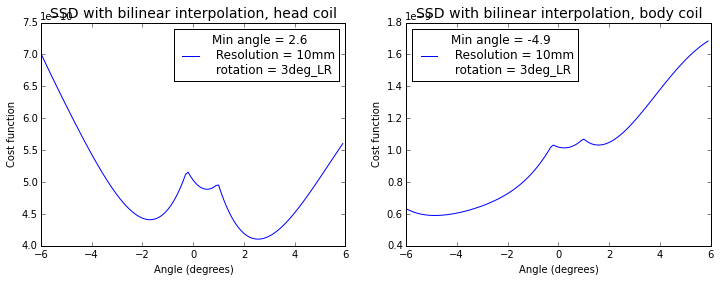

 14 14

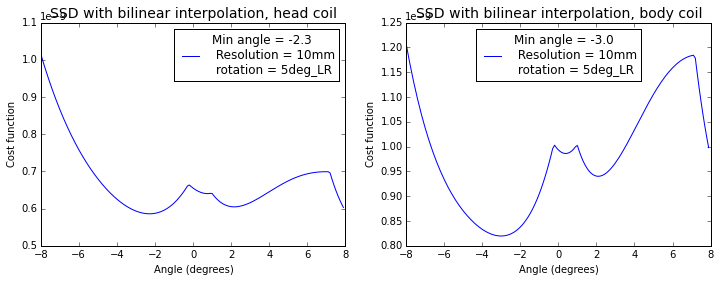

 14 14

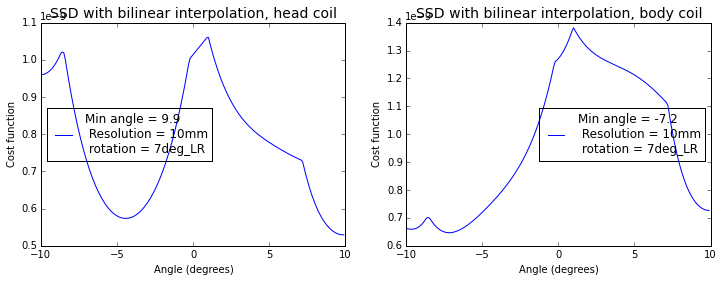

 14 14

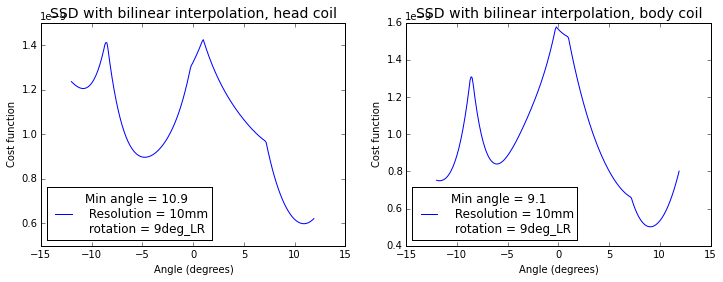

 14 14

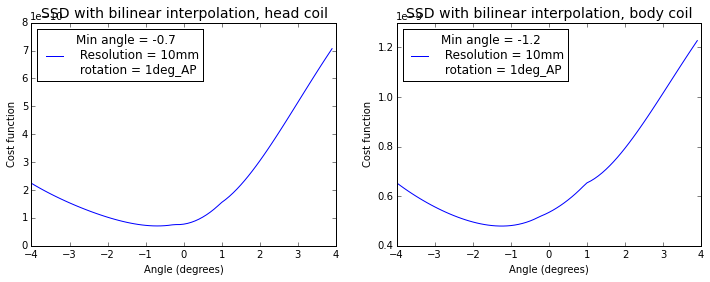

 14 14

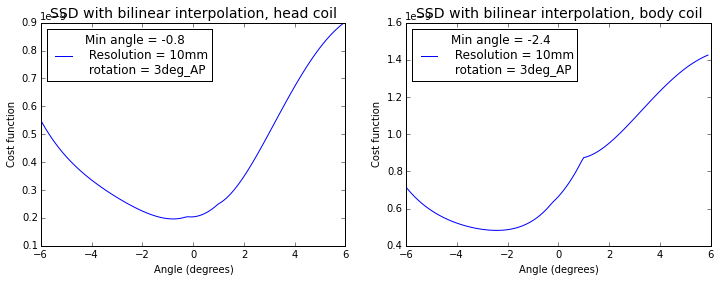

 14 14

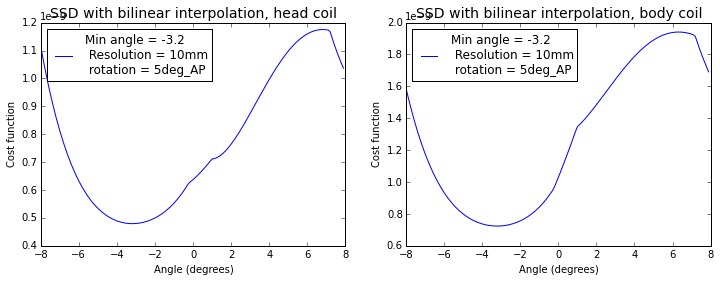

 14 14

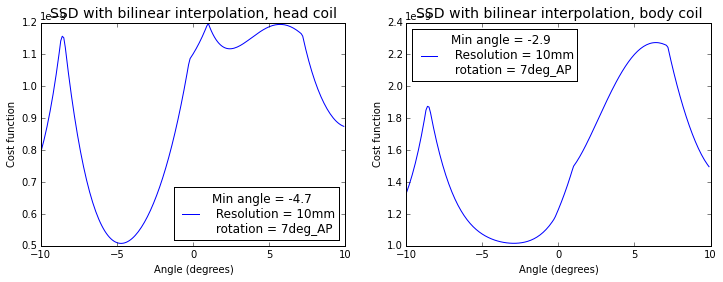

 14 14

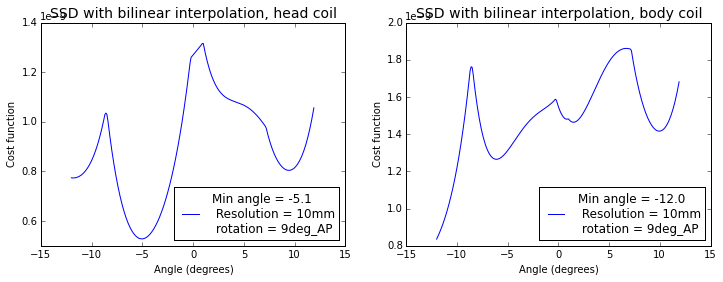

In [35]:
# 20 Halton Samples 
N = 30
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                halton_cost = rot_halton_cost_func(data_dict[res][coil]['iso'][0],
                                           data_dict[res][coil][rot][deg][0], 
                                           N, thetas, axis=0, interpolation='bilinear')
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, halton_cost, res, 'bilinear',deg+'_'+rot, coil)
            plt.show()

22 22

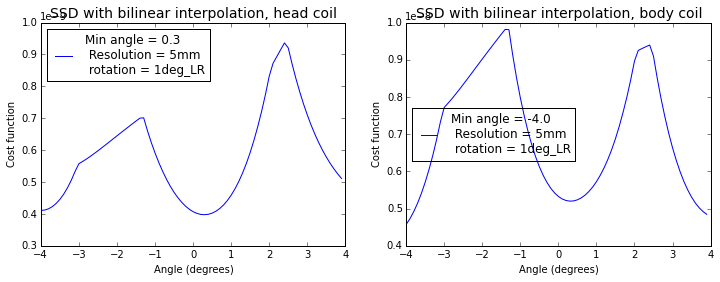

 22 22

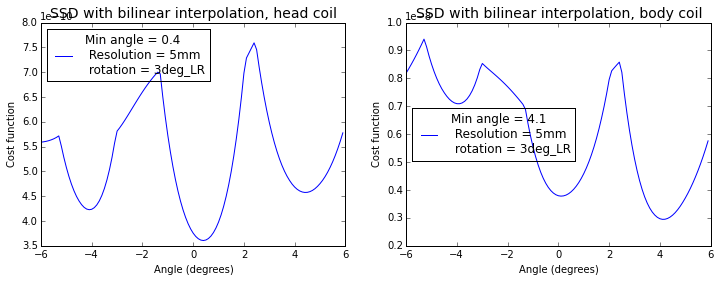

 22 22

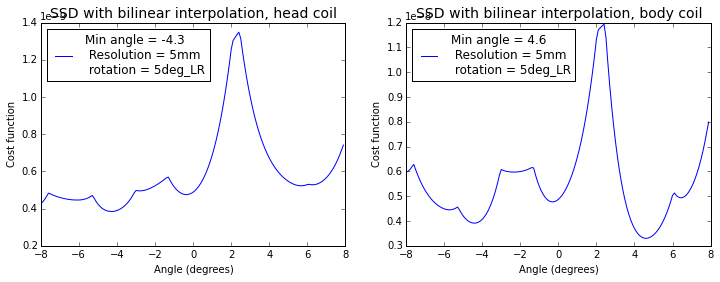

 22 22

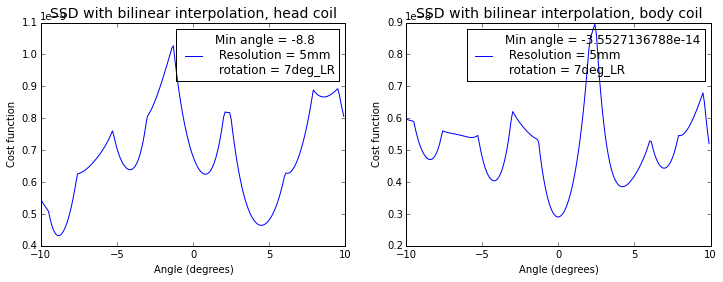

 22 22

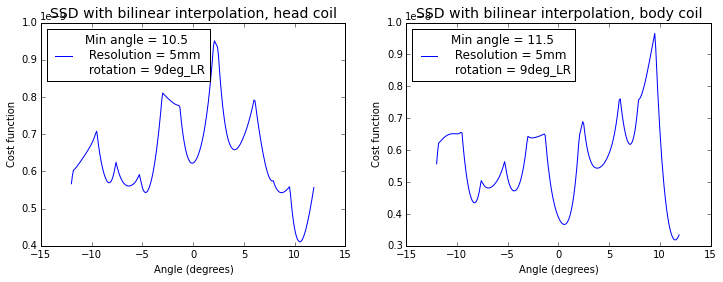

 22 22

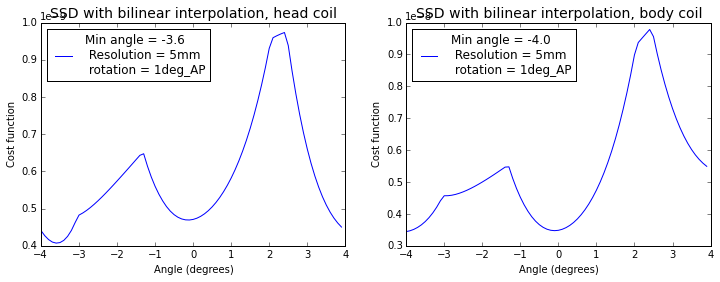

 22 22

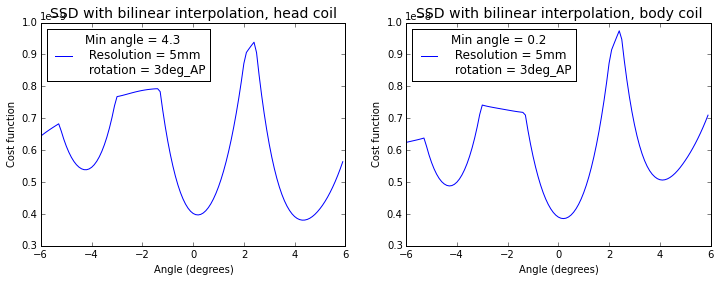

 22 22

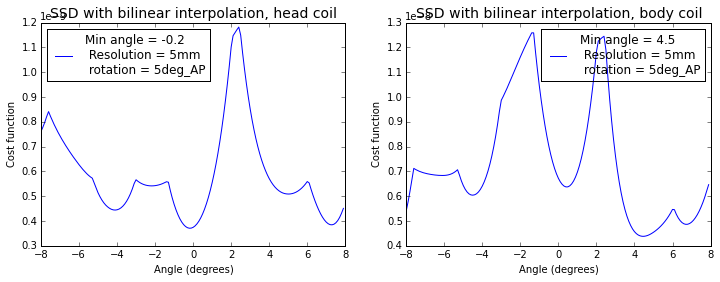

 22 22

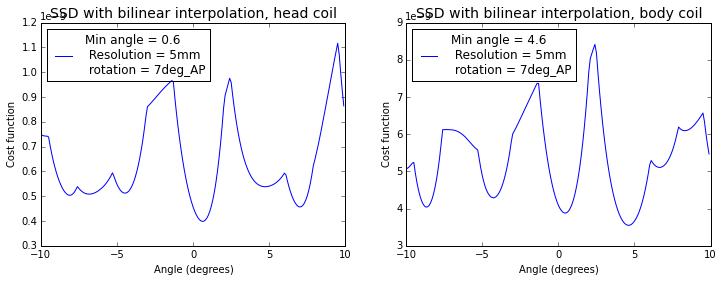

 22 22

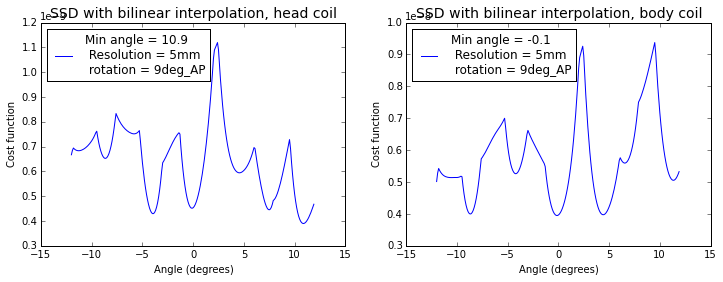

 22 22

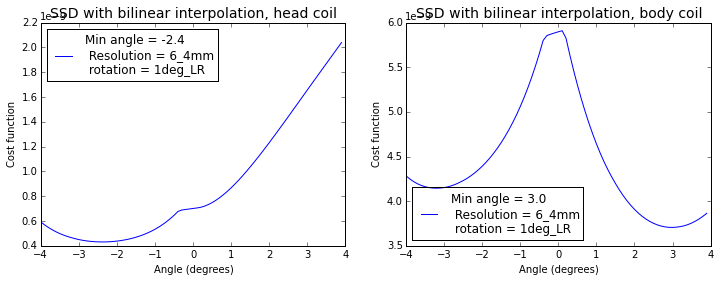

 22 22

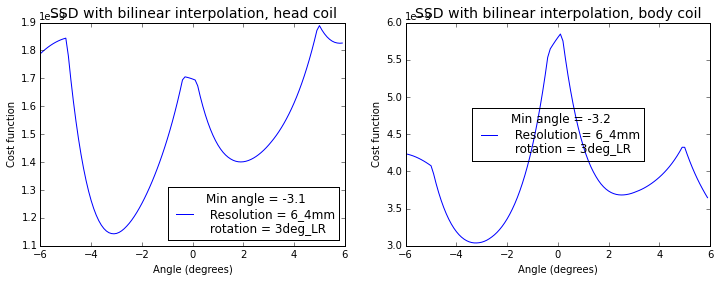

 22 22

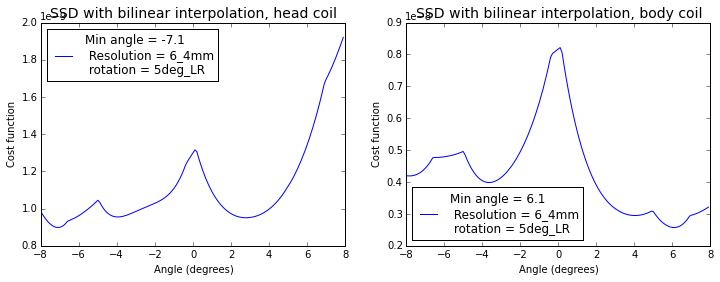

 22 22

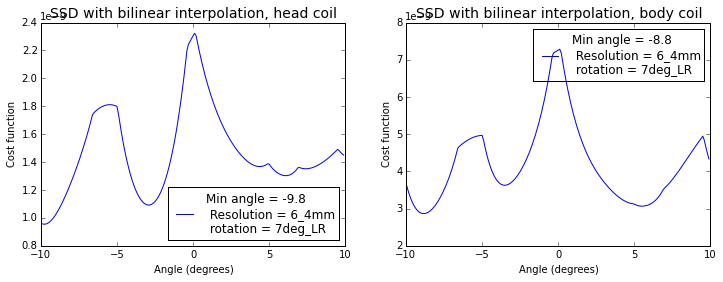

 22 22

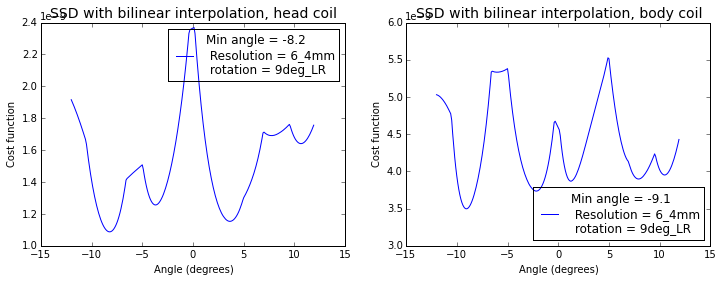

 22 22

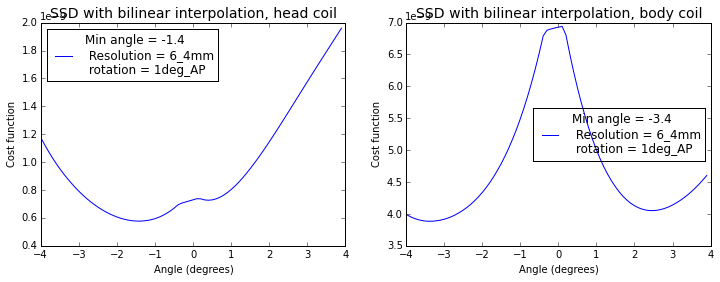

 22 22

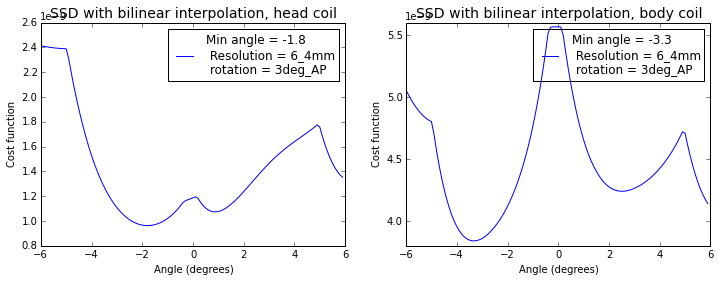

 22 22

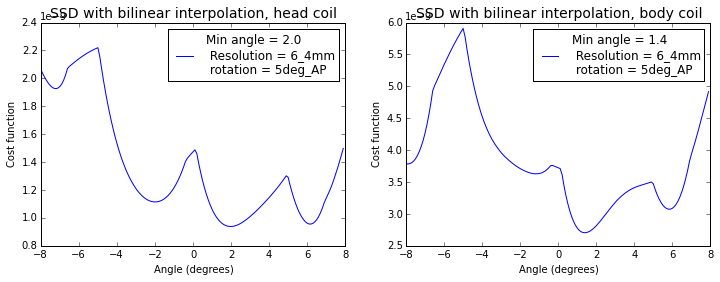

 22 22

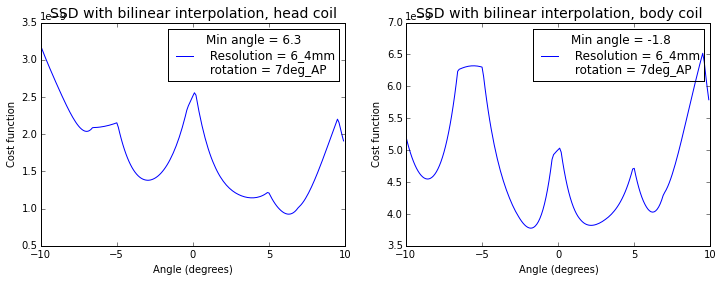

 22 22

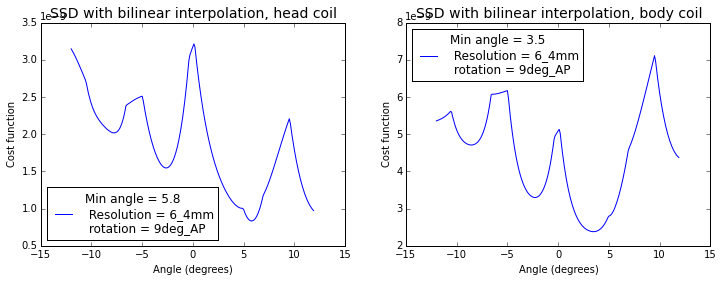

 22 22

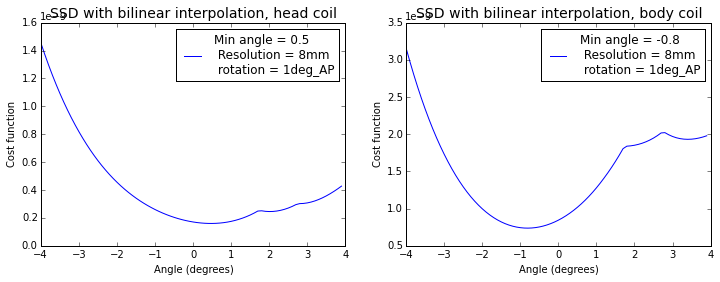

 22 22

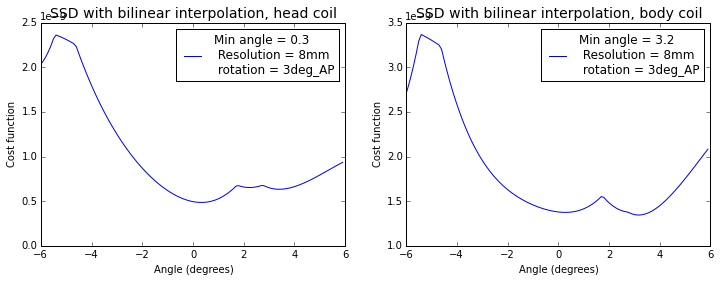

 22 22

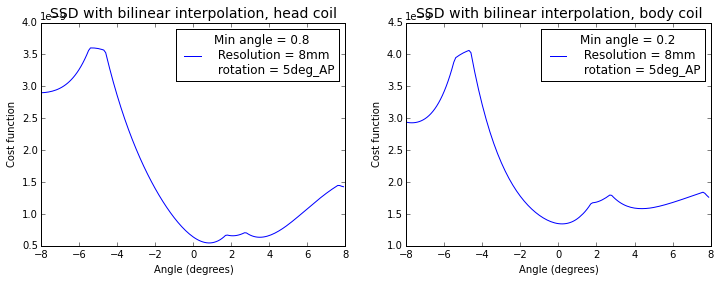

 22 22

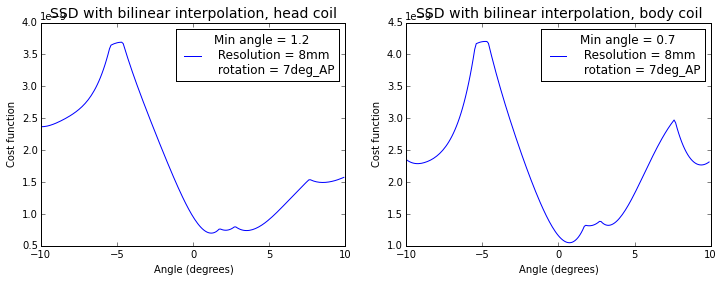

 22 22

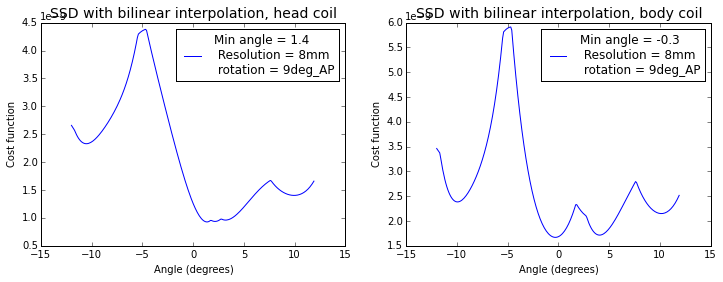

 22 22

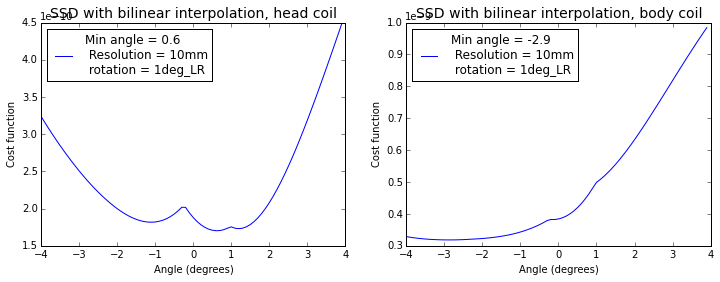

 22 22

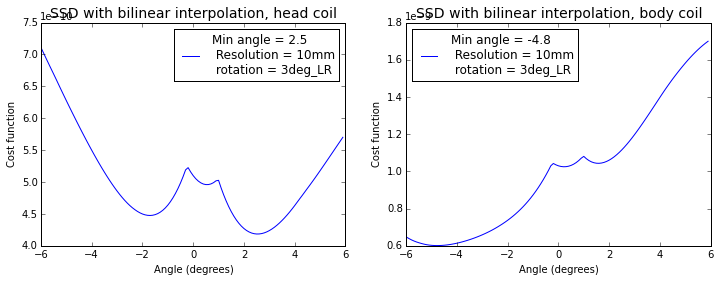

 22 22

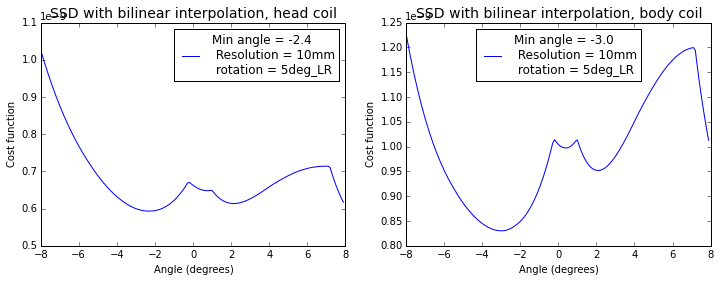

 22 22

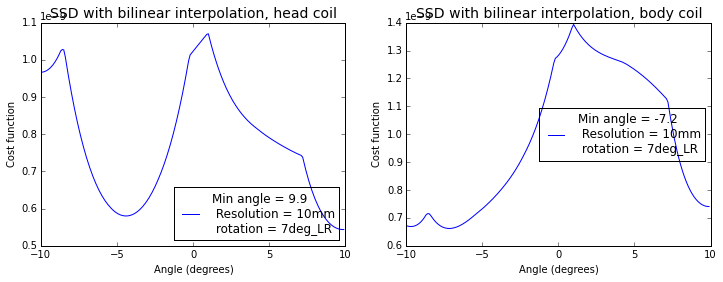

 22 22

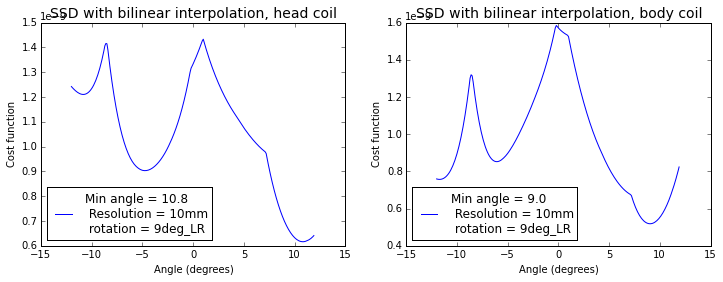

 22 22

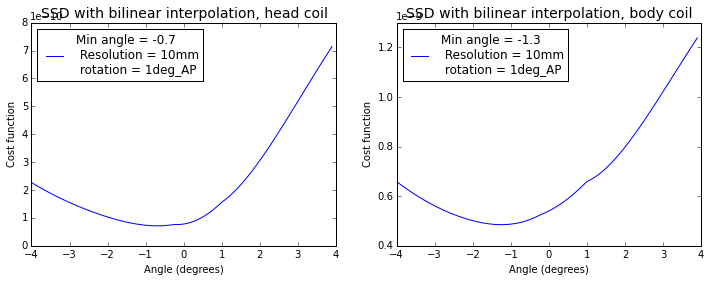

 22 22

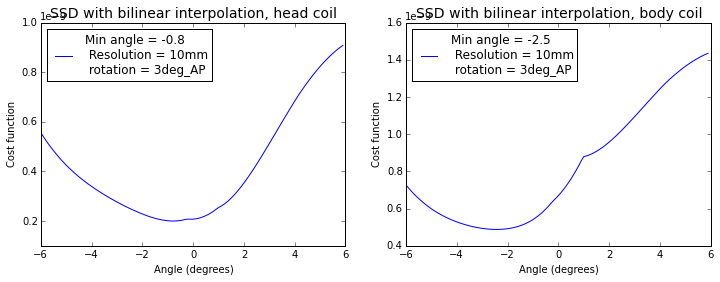

 22 22

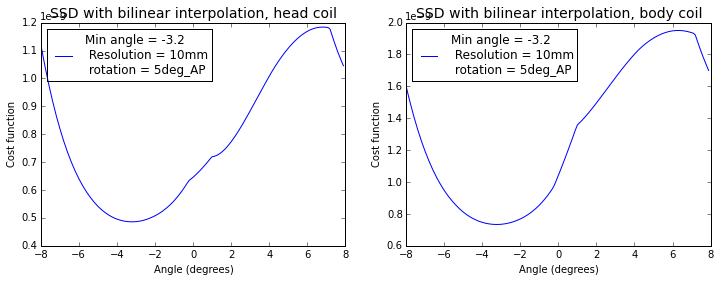

 22 22

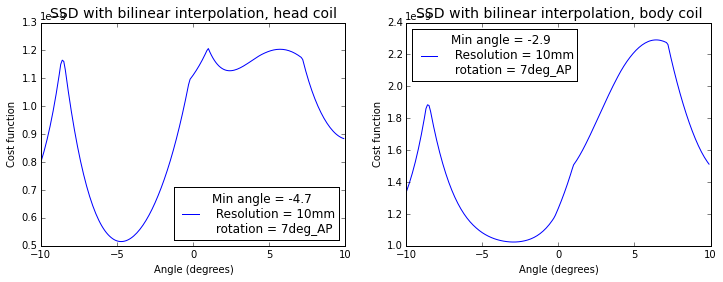

 22 22

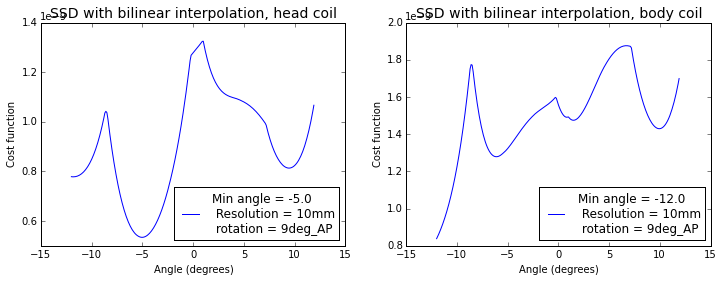

In [36]:
# 20 Halton Samples 
N = 50
rot_axes = ['LR','AP']
degrees = ['1deg','3deg','5deg','7deg','9deg']
resolutions = ['5mm','6_4mm','8mm','10mm']
for res in resolutions:
    for rot in rot_axes:
        if((res == '8mm') & (rot == 'LR')):
           continue
        if(rot == 'LR'): ax = 0
        if(rot == 'AP'): ax = 1
        for deg in degrees:
            plt.figure(figsize=[12,4])
            for idx, coil in enumerate(['head', 'body']):
                d = int(deg[0])
                thetas = np.arange(-d-3,d+3,0.1)
                halton_cost = rot_halton_cost_func(data_dict[res][coil]['iso'][0],
                                           data_dict[res][coil][rot][deg][0], 
                                           N, thetas, axis=0, interpolation='bilinear')
                plt.subplot(1,2,idx+1)
                plot_cost_func(thetas, halton_cost, res, 'bilinear',deg+'_'+rot, coil)
            plt.show()

In [ ]:
dict_3res = pickle.load(open('dict_3res.p','rb'))

In [ ]:
cost_dict_3res = pickle.load(open('cost_dict_3res_linear.p','rb'))
resolutions = ['6_4mm','8mm','10mm']
rotations = ['5_deg_RL','5_deg_AP','5_deg_HF']
thetas = np.arange(-7,-3,0.01)
cost_dict_3res = {}
for res in resolutions:
    cost_dict_3res[res] = {}
    plt.figure(figsize = [30,10])
    for ax, rot in enumerate(rotations):
        cost_dict_3res[res][rot] = []
        plt.subplot(1,3,ax+1)
        for i in xrange(5):
            plot_cost_func(thetas, cost_dict_3res[res][rot][i], res, 'bilinear',rot+str(i+1), 'head')
    plt.show()